# test the mlxtend bagage

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth

# 转化数据集为list-in-lists

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
df.rename(columns={'sepal length (cm)':'sepal_length','sepal width (cm)':'sepal_width','petal length (cm)':'petal_length','petal width (cm)':'petal_width'},inplace=True)

In [5]:
df_columns=df.columns

In [6]:
# 筛选符合条件的列
df=df.select_dtypes(exclude=['object'])
df=df.filter(regex='sep|th')

**如果是kivi分箱以后的区间，则需要将区间值还原，如下图**

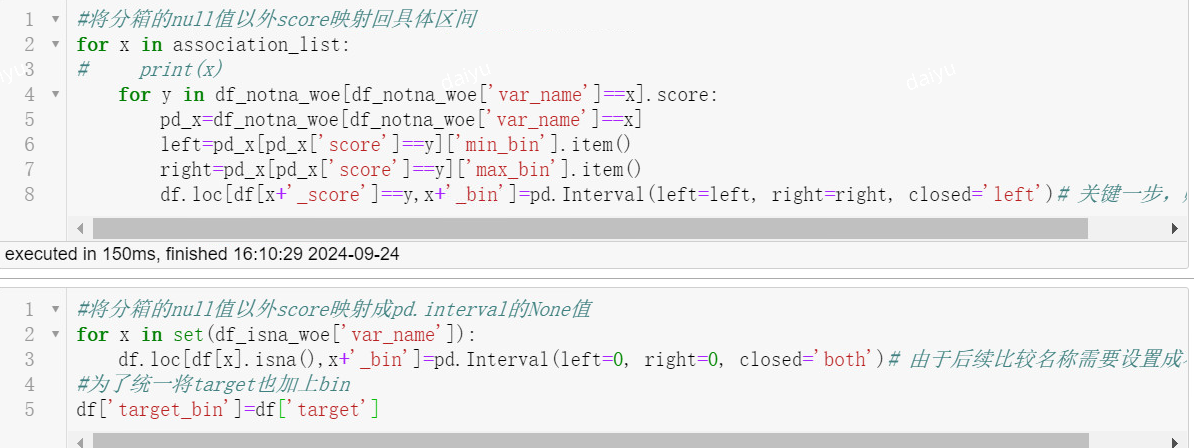

In [7]:
#将列内等频切分的区间值合并成一个可与列外进行区分字符串
qut_list=[]
items_list=[]
for x in df_columns:
    df[x+'_cut']=pd.qcut(df[x],4)# 等频切分
    df[x+'_str']=str(x)+':'
    df[x+'_items']=df[x+'_str']+df[x+'_cut'].astype('str')
    qut_list=qut_list+[x+'_cut']
    items_list=items_list+[x+'_items']

In [8]:
#将列内等频切分区间值合并成一个可与列外进行区分的元组
qut_list=[]
items_list=[]
for x in df_columns:
    df[x+'_cut']=pd.qcut(df[x],4)
    df[x+'_str']=str(x)
    df[x+'_items']=df.apply(lambda z:(z[x+'_str'],z[x+'_cut']),axis=1) # x 循环内的其他函数仍有效，apply批量执行形成元组，直接操作无法实现。
    qut_list=qut_list+[x+'_cut']
    items_list=items_list+[x+'_items']

In [9]:
df['petal_width_items']

0      (petal_width, (0.099, 0.3])
1      (petal_width, (0.099, 0.3])
2      (petal_width, (0.099, 0.3])
3      (petal_width, (0.099, 0.3])
4      (petal_width, (0.099, 0.3])
                  ...             
145      (petal_width, (1.8, 2.5])
146      (petal_width, (1.8, 2.5])
147      (petal_width, (1.8, 2.5])
148      (petal_width, (1.8, 2.5])
149      (petal_width, (1.3, 1.8])
Name: petal_width_items, Length: 150, dtype: object

In [16]:
df[items_list]

,sepal_length_items,sepal_width_items,petal_length_items,petal_width_items
0,"(sepal_length, (4.2989999999999995, 5.1])","(sepal_width, (3.3, 4.4])","(petal_length, (0.999, 1.6])","(petal_width, (0.099, 0.3])"
1,"(sepal_length, (4.2989999999999995, 5.1])","(sepal_width, (2.8, 3.0])","(petal_length, (0.999, 1.6])","(petal_width, (0.099, 0.3])"
2,"(sepal_length, (4.2989999999999995, 5.1])","(sepal_width, (3.0, 3.3])","(petal_length, (0.999, 1.6])","(petal_width, (0.099, 0.3])"
3,"(sepal_length, (4.2989999999999995, 5.1])","(sepal_width, (3.0, 3.3])","(petal_length, (0.999, 1.6])","(petal_width, (0.099, 0.3])"
4,"(sepal_length, (4.2989999999999995, 5.1])","(sepal_width, (3.3, 4.4])","(petal_length, (0.999, 1.6])","(petal_width, (0.099, 0.3])"
...,...,...,...,...
145,"(sepal_length, (6.4, 7.9])","(sepal_width, (2.8, 3.0])","(petal_length, (5.1, 6.9])","(petal_width, (1.8, 2.5])"
146,"(sepal_length, (5.8, 6.4])","(sepal_width, (1.999, 2.8])","(petal_length, (4.35, 5.1])","(petal_width, (1.8, 2.5])"
147,"(sepal_length, (6.4, 7.9])","(sepal_width, (2.8, 3.0])","(petal_length, (5.1, 6.9])","(petal_width, (1.8, 2.5])"
148,"(sepal_length, (5.8, 6.4])","(sepal_width, (3.3, 4.4])","(petal_length, (5.1, 6.9])","(petal_width, (1.8, 2.5])"


In [11]:
# 将pd转成list-in-lists形式
p=df[items_list].apply(lambda x:x.to_list(),axis=1).to_list()

In [12]:
# 将数据集转换为适合FP-Growth算法的格式
te = TransactionEncoder()
te_ary = te.fit(p).transform(p)#不支持字典hashable，项名称需要进行对比，不支持内部包含none，无法与其他类型进行对比

df_te = pd.DataFrame(te_ary, columns=te.columns_)
# 使用FP-Growth算法寻找频繁项集，利用max_len控制频繁项的元素个数
frequent_itemsets = fpgrowth(df_te, min_support=0.2, max_len=3,use_colnames=True)
# 打印频繁项集
print(frequent_itemsets)

     support                                           itemsets
0   0.293333                     ((petal_length, (0.999, 1.6]))
1   0.273333        ((sepal_length, (4.2989999999999995, 5.1]))
2   0.273333                      ((petal_width, (0.099, 0.3]))
3   0.246667                        ((sepal_width, (3.3, 4.4]))
4   0.240000                        ((sepal_width, (2.8, 3.0]))
5   0.200000                        ((sepal_width, (3.0, 3.3]))
6   0.260000                       ((sepal_length, (5.1, 5.8]))
7   0.246667                        ((petal_width, (0.3, 1.3]))
8   0.206667                      ((petal_length, (1.6, 4.35]))
9   0.313333                      ((sepal_width, (1.999, 2.8]))
10  0.273333                      ((petal_length, (4.35, 5.1]))
11  0.253333                        ((petal_width, (1.3, 1.8]))
12  0.233333                       ((sepal_length, (6.4, 7.9]))
13  0.233333                       ((sepal_length, (5.8, 6.4]))
14  0.226667                        ((pe

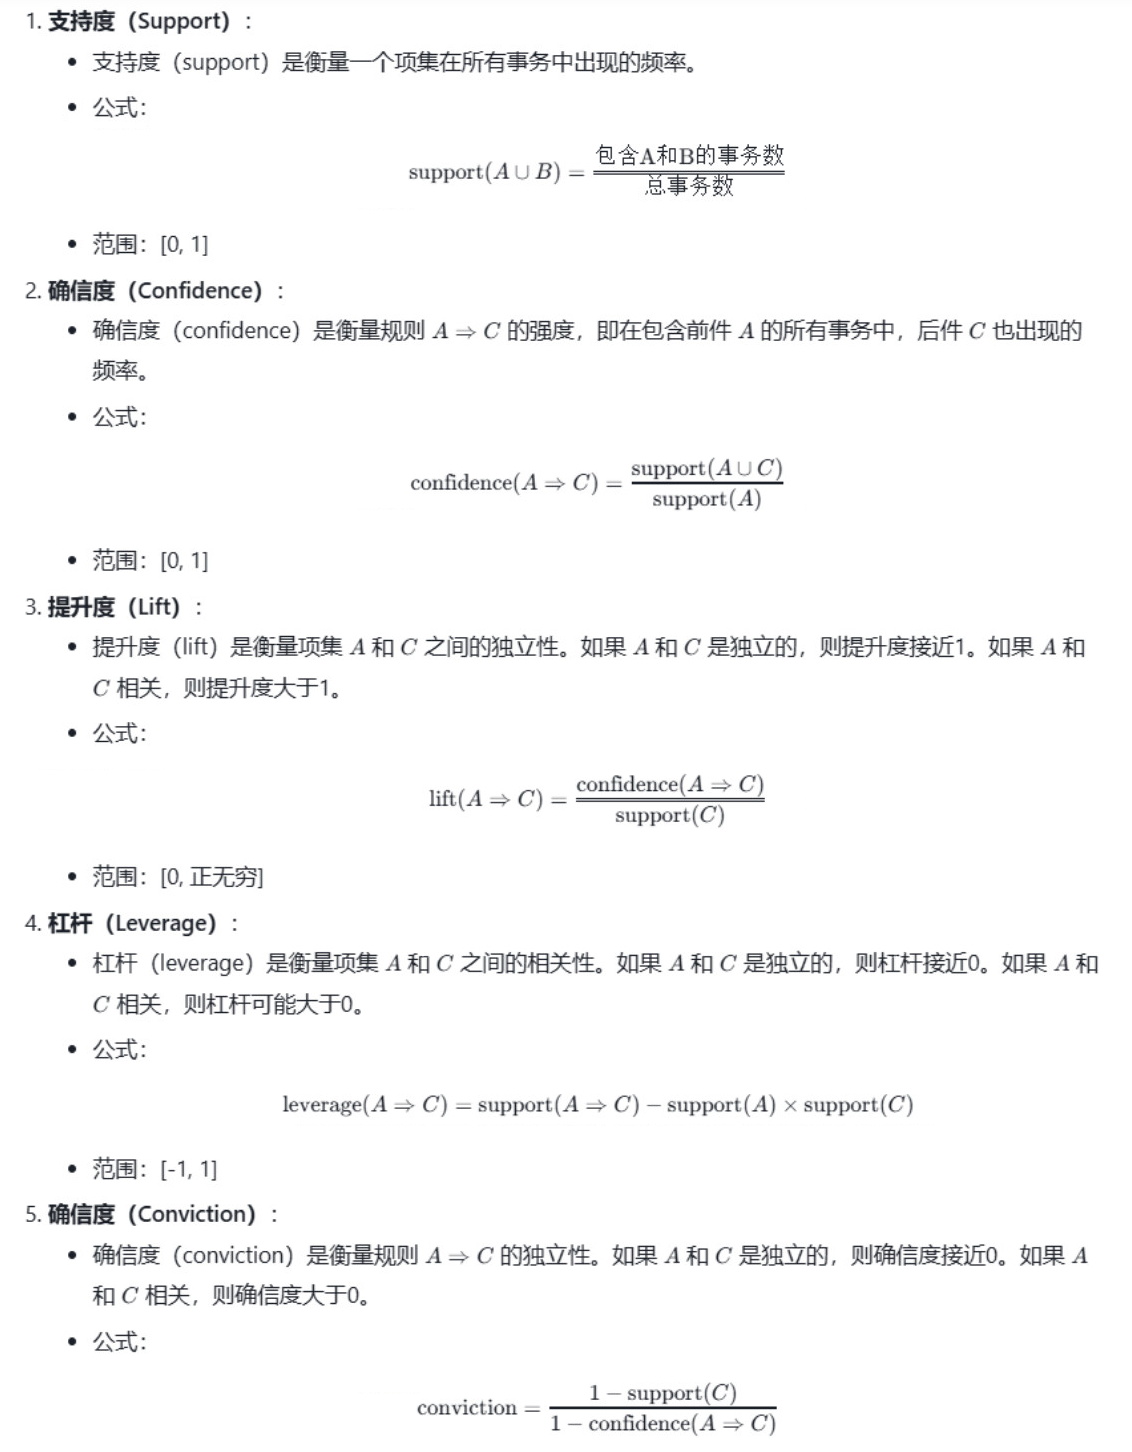

In [13]:

from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)
print(rules)

                                         antecedents  \
0                      ((petal_width, (0.099, 0.3]))   
1  ((petal_width, (0.099, 0.3]), (sepal_length, (...   
2  ((sepal_length, (4.2989999999999995, 5.1]), (p...   

                      consequents  antecedent support  consequent support  \
0  ((petal_length, (0.999, 1.6]))            0.273333            0.293333   
1  ((petal_length, (0.999, 1.6]))            0.206667            0.293333   
2   ((petal_width, (0.099, 0.3]))            0.220000            0.273333   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.253333    0.926829  3.159645  0.173156    9.657778       0.940608  
1  0.200000    0.967742  3.299120  0.139378   21.906667       0.878431  
2  0.200000    0.909091  3.325942  0.139867    7.993333       0.896581  


In [14]:
#自定义apply的执行判断函数，apply函数调用的时候相当于单个考虑，执行的时候是批量执行。
def iterative_contain_determine(pd_series,contain_element):
    for x in pd_series:
        for z in x:
            print(z)
            if contain_element in z:
                return True
            else: return False

In [17]:
#取consequents推后项中包含需要的推断内容，挑选符合条件的rules
rules[rules['consequents'].apply(iterative_contain_determine,contain_element='petal_length')]

petal_length
petal_length
petal_width


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"((petal_width, (0.099, 0.3]))","((petal_length, (0.999, 1.6]))",0.273333,0.293333,0.253333,0.926829,3.159645,0.173156,9.657778,0.940608
1,"((petal_width, (0.099, 0.3]), (sepal_length, (...","((petal_length, (0.999, 1.6]))",0.206667,0.293333,0.200000,0.967742,3.299120,0.139378,21.906667,0.878431


In [19]:
antecedents_rules=rules[rules['consequents'].apply(iterative_contain_determine,contain_element='petal_length')]['antecedents'].values
antecedents_rules

petal_length
petal_length
petal_width


array([frozenset({('petal_width', Interval(0.099, 0.3, closed='right'))}),
       frozenset({('petal_width', Interval(0.099, 0.3, closed='right')), ('sepal_length', Interval(4.2989999999999995, 5.1, closed='right'))})],
      dtype=object)

In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_cut,sepal_length_str,sepal_length_items,sepal_width_cut,sepal_width_str,sepal_width_items,petal_length_cut,petal_length_str,petal_length_items,petal_width_cut,petal_width_str,petal_width_items
0,5.1,3.5,1.4,0.2,"(4.2989999999999995, 5.1]",sepal_length,"(sepal_length, (4.2989999999999995, 5.1])","(3.3, 4.4]",sepal_width,"(sepal_width, (3.3, 4.4])","(0.999, 1.6]",petal_length,"(petal_length, (0.999, 1.6])","(0.099, 0.3]",petal_width,"(petal_width, (0.099, 0.3])"
1,4.9,3.0,1.4,0.2,"(4.2989999999999995, 5.1]",sepal_length,"(sepal_length, (4.2989999999999995, 5.1])","(2.8, 3.0]",sepal_width,"(sepal_width, (2.8, 3.0])","(0.999, 1.6]",petal_length,"(petal_length, (0.999, 1.6])","(0.099, 0.3]",petal_width,"(petal_width, (0.099, 0.3])"
2,4.7,3.2,1.3,0.2,"(4.2989999999999995, 5.1]",sepal_length,"(sepal_length, (4.2989999999999995, 5.1])","(3.0, 3.3]",sepal_width,"(sepal_width, (3.0, 3.3])","(0.999, 1.6]",petal_length,"(petal_length, (0.999, 1.6])","(0.099, 0.3]",petal_width,"(petal_width, (0.099, 0.3])"
3,4.6,3.1,1.5,0.2,"(4.2989999999999995, 5.1]",sepal_length,"(sepal_length, (4.2989999999999995, 5.1])","(3.0, 3.3]",sepal_width,"(sepal_width, (3.0, 3.3])","(0.999, 1.6]",petal_length,"(petal_length, (0.999, 1.6])","(0.099, 0.3]",petal_width,"(petal_width, (0.099, 0.3])"
4,5.0,3.6,1.4,0.2,"(4.2989999999999995, 5.1]",sepal_length,"(sepal_length, (4.2989999999999995, 5.1])","(3.3, 4.4]",sepal_width,"(sepal_width, (3.3, 4.4])","(0.999, 1.6]",petal_length,"(petal_length, (0.999, 1.6])","(0.099, 0.3]",petal_width,"(petal_width, (0.099, 0.3])"


In [49]:
# 批量的验证策略在不同样本空间的下的有效性
strategy_affect_df=pd.DataFrame(columns=['antecedents','bad_cnt','good_cnt'])
for x in antecedents_rules:
    print(x)
    temp_df=df.copy()
    for y in x :
        print(y)
        print(y[1].left)
        print(y[1].right)
        print(y[1].closed)
        # temp_df=temp_df[temp_df[y[0]+'_items']==y]#该句适用数据集中包含规则项的
        if y[1].left==0 and y[1].left==y[1].right:
            temp_df=temp_df[temp_df[y[0]].isna()]
        else:
            temp_df=temp_df[(temp_df[y[0]]>y[1].left)&(temp_df[y[0]]<=y[1].right)]
        print(len(temp_df))
    # print(temp_df)
    bad_cnt=len(temp_df[temp_df['petal_length']==1])
    good_cnt=len(temp_df[temp_df['petal_length']==0])
    strategy_affect_df=strategy_affect_df.append(pd.Series([x,bad_cnt,good_cnt],index=strategy_affect_df.columns),ignore_index=True)

SyntaxError: invalid character '：' (U+FF1A) (738360202.py, line 12)

In [41]:
df[df['petal_length']==1]

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_cut,sepal_length_str,sepal_length_items,sepal_width_cut,sepal_width_str,sepal_width_items,petal_length_cut,petal_length_str,petal_length_items,petal_width_cut,petal_width_str,petal_width_items
22,4.6,3.6,1.0,0.2,"(4.2989999999999995, 5.1]",sepal_length,"(sepal_length, (4.2989999999999995, 5.1])","(3.3, 4.4]",sepal_width,"(sepal_width, (3.3, 4.4])","(0.999, 1.6]",petal_length,"(petal_length, (0.999, 1.6])","(0.099, 0.3]",petal_width,"(petal_width, (0.099, 0.3])"


In [45]:
pd.options.display.max_colwidth = 100
strategy_affect_df

,antecedents,bad_cnt,good_cnt
0,"((petal_width, (0.099, 0.3]))",1,0
1,"((petal_width, (0.099, 0.3]), (sepal_length, (4.2989999999999995, 5.1]))",1,0
